In [3]:
#1. Realizar un análisis exploratorio de los datos para identificar 
#relaciones entre variables, valores atípicos, tendencias, etc. 

In [4]:
#Libería necesaria

import pandas as pd #Análisis y lectura de datos
import numpy as np #Cálculo nrico y análisis de datos
import seaborn as sns #Creación gráfica estadístico
import matplotlib.pyplot as plt #Creación de gráficos 2D
import plotly.graph_objs as go #Creación de gráficos 3D
import plotly.express as px #Creación de gráficos 3D


#Librería para implementar Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

#Librería para implementar Kmeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar advertencia de Kmeans, pérdida de memoría
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Lectura de datos de Python
Datos = pd.read_csv('C:/Users/USER/3D Objects/Mall_Customers.csv')

In [9]:
Datos.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [10]:
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Valores de ingresos anual')

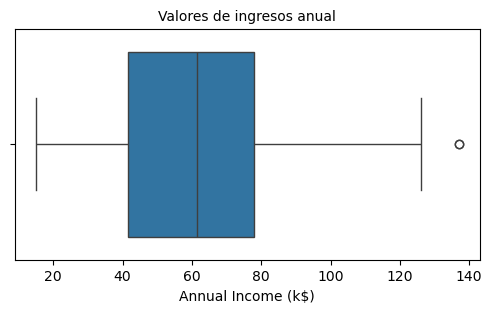

In [11]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Dataset['Annual Income (k$)'])
plt.title('Valores de ingresos anual', fontsize=10)

Text(0.5, 1.0, 'Puntuación de gastos')

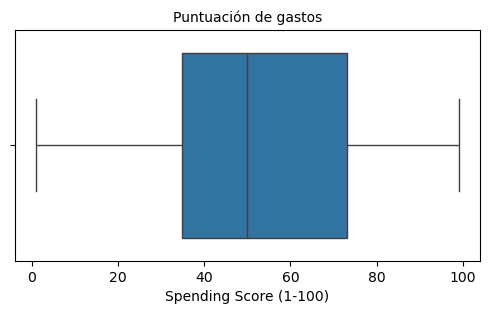

In [12]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Dataset['Spending Score (1-100)'])
plt.title('Puntuación de gastos', fontsize=10)

In [13]:
#2  Preprocesar los datos limpiándolos, tratando valores faltantes y 
#transformándolos según sea necesario. 

In [16]:
#Revisión de datos faltantes

print("Cantidad de registros con 0 edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de registros con 0 ingresos anuales: ",Datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de registros con 0 puntuación de gastos: ",Datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de registros con 0 edad:  0
Cantidad de registros con 0 ingresos anuales:  0
Cantidad de registros con 0 puntuación de gastos:  0


In [18]:
#Si hay datos faltantes, se remplazan con promedio de la columna

Datos['Annual Income (k$)']=Datos['Annual Income (k$)'].replace(0,Datos['Annual Income (k$)'].mean())

Text(0.5, 1.0, 'Valores de ingresos anual')

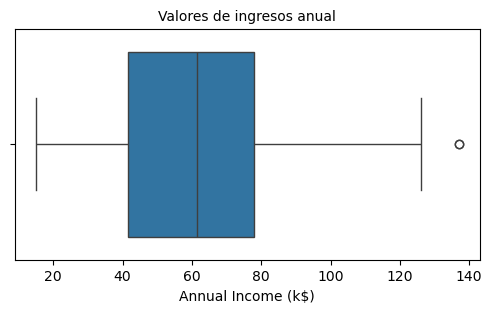

In [19]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Dataset['Annual Income (k$)'])
plt.title('Valores de ingresos anual', fontsize=10)

In [21]:
#Conteo de datos atípicos
nivel_min =1
nivel_max =100
Total_atip =((Datos['Spending Score (1-100)']<nivel_min)|(Datos['Spending Score (1-100)']>nivel_max)).sum()
print("Total de valores atípicos son: {}".format(Total_atip))

Total de valores atípicos son: 0


In [22]:
#Visualización de tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Seleccionar las características más relevantes para entrenar el 
#modelo utilizando selección de características
#Las características de agrupamiento son:
#Gender	
#Age	
#Annual Income (k$)	
#Spending Score (1-100)


In [23]:
#Filtrar columnas del modelo

Datos = Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [24]:
#mostrar los datos
Datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


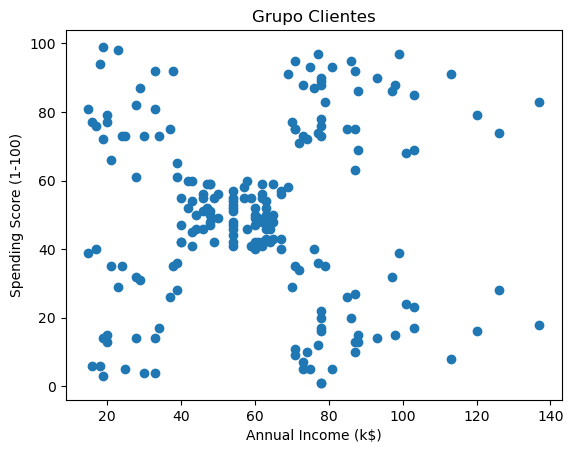

In [27]:
#Gráfica antes dle agrupamiento

plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupo Clientes')
plt.show()

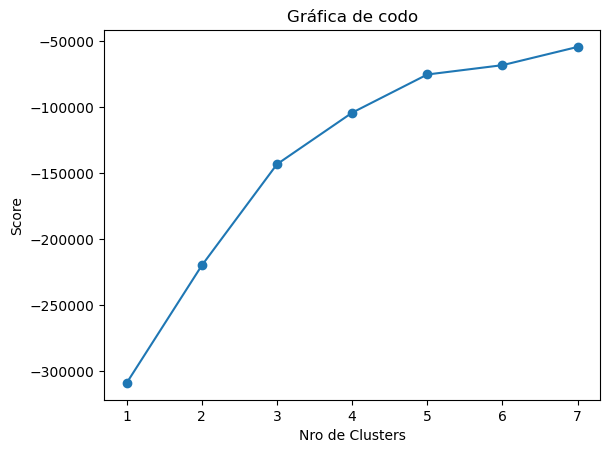

In [30]:
#Entrenar el modelo configurando los diferentes hiperparámetros. 
#Se realiza gráfica de codo para identificar el valor de K

Nc = range(1,8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc, score, marker='o')
plt.xlabel('Nro de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de codo')
plt.show()

In [34]:
#Generación de modelo de agrupamiento con K=5, o sea, se hará 5 agrupamientos.

Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=5, random_state=0)

In [35]:
#Se agrega la columna Grupo a la BD para identificar el nro de agrupamientos

Modelo.labels_
Datos["Grupo"] = Modelo.labels_
print (Datos)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      2
1     21                  15                      81      2
2     20                  16                       6      0
3     23                  16                      77      2
4     31                  17                      40      0
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


In [40]:
#5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette,
#Índice de Calinski-Harabasz, etc. 

#Preparación de la métrica de columna Grupo
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

#Calcular las métricas
sil_score = silhouette_score(X, clusters)
calinski_score =calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

#Creación de tabla para mostrar los valores métricos
table_data = [
    ["Nro de observaciones", Observaciones],
    ["Coeficiente silhouette", sil_score],
    ["Indice Caliski Harabasz",calinski_score],
    ["indice Davies Bouldin", davies_score]
]

#Mostrar tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric","Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
|  Nro de observaciones   |        200         |
| Coeficiente silhouette  | 0.3771108731967625 |
| Indice Caliski Harabasz | 133.49030043802063 |
|  indice Davies Bouldin  | 0.9845471043038023 |
+-------------------------+--------------------+


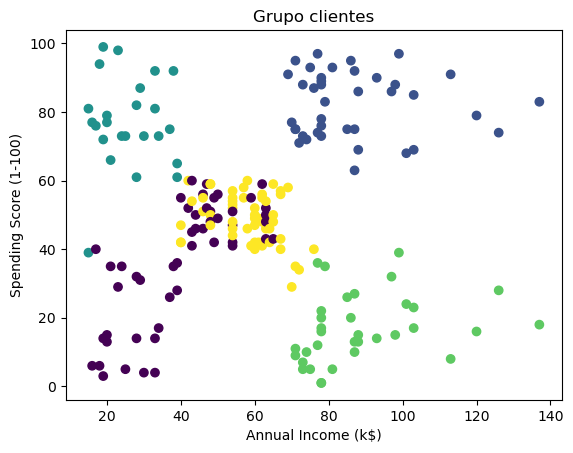

In [43]:
#Realizar las diferentes gráficas que permitan visualizar los 
#resultados del modelo 

plt.scatter(Datos['Annual Income (k$)'],Datos['Spending Score (1-100)'], c=Datos['Grupo'],cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupo clientes')
plt.show()

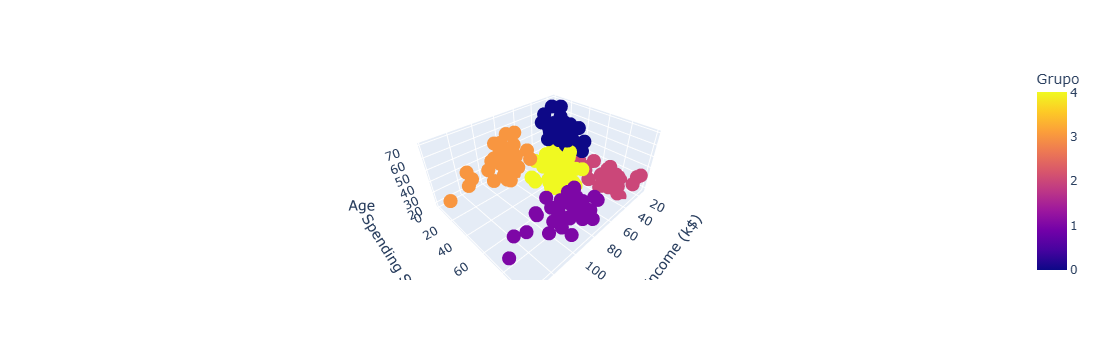

In [50]:
#Crear modelo 3D

Grafica_3D = px.scatter_3d(Datos, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color ='Grupo', symbol_map={0: 'circle',1: 'circle',2: 'circle', 3:'circle',4:'circle',5:'circle'})
Grafica_3D.update_layout(showlegend=False)